<a href="https://colab.research.google.com/github/Jarikki/Project/blob/main/14%EA%B8%B0_%EC%B5%9C%EC%A4%80%ED%83%9C_project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

In [2]:
from google.colab import files
uploaded = files.upload()

Saving vgames2.csv to vgames2.csv


In [3]:
#한글 폰트 깨짐 해결 코드
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 49 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (9,982 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [4]:
df = pd.read_csv('vgames2.csv')

In [5]:
#Year 칼럼 이상표기 수정
df_y = df.copy()
df_y = df_y.dropna()
df_yr =df_y[df_y['Year'] < 100]
df_yr['Year'] = df_yr['Year'].replace({0:2000, 1:2001, 2:2002, 3:2003, 4:2004, 5:2005 ,6:2006, 7:2007, 8:2008, 9:2009, 10:2010,
             11:2011, 12:2012, 13:2013, 14:2014, 15:2015, 16:2016, 86:1986, 94:1994, 95:1995, 96:1996,
             97:1997, 98:1998})
df_y.update(df_yr)
df.update(df_y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


In [6]:
# 1.판매량 단위 통일(M으로)

#나라별 판매량 칼럼 하나씩 뽑아서 K제거 및 1000으로 나누기(df1 = 4개나라 판매량 칼럼 묶은거, df_1,2,3,4 = 4개 나라 각각 칼럼 )
df1 = df.iloc[:,6:]
df1.head(11)

,NA_Sales,EU_Sales,JP_Sales,Other_Sales
0,0.04,0,0,0
1,0.17,0,0,0.01
2,0,0,0.02,0
3,0.04,0,0,0
4,0.12,0.09,0,0.04
5,0,0,0.14,0
6,0.02,0.01,0,0
7,0.07,0,0.11,0.01
8,0,0,0.04,0
9,0.04,0.03,0,0.01


In [7]:
df1_1 = df1[['NA_Sales']][df1['NA_Sales'].str.contains("K")]
df1_1= pd.DataFrame(df1_1.NA_Sales.str.replace('K', ''))
df1_1=df1_1.astype(float)
df1_1 = df1_1.div(1000)
df1_1.head(10)

,NA_Sales
10,0.48
45,0.06
145,0.00
878,0.00
1086,0.00
1359,0.49
1456,0.24
1475,0.00
1838,0.15
1922,0.00


In [8]:
df1_2 = df1[['EU_Sales']][df1['EU_Sales'].str.contains("K")]
df1_2= pd.DataFrame(df1_2.EU_Sales.str.replace('K', ''))
df1_2=df1_2.astype(float)
df1_2 = df1_2.div(1000)
df1_2.head(10)

,EU_Sales
128,0.00
138,0.05
502,0.62
972,0.76
996,0.08
1094,0.08
1263,0.05
1375,0.02
1473,0.05
1555,0.04


In [9]:
df1_3 = df1[['JP_Sales']][df1['JP_Sales'].str.contains("K")]
df1_3= pd.DataFrame(df1_3.JP_Sales.str.replace('K', ''))
df1_3=df1_3.astype(float)
df1_3 = df1_3.div(1000)
df1_3.head(10)

,JP_Sales
10,0.00
89,0.00
90,0.00
827,0.03
844,0.00
1483,0.04
1600,0.05
1904,0.00
2318,0.21
2400,0.16


In [10]:
df1_4 = df1[['Other_Sales']][df1['Other_Sales'].str.contains("K")]
df1_4= pd.DataFrame(df1_4.Other_Sales.str.replace('K', ''))
df1_4=df1_4.astype(float)
df1_4= df1_4.div(1000)
df1_4.head(10)

,Other_Sales
245,0.01
280,0.00
399,0.03
642,0.03
874,0.01
1213,0.05
1276,0.00
1566,0.00
1585,0.00
1650,0.00


In [11]:
#수정한 값 업데이트
df1.update(df1_1)
df1.update(df1_2)
df1.update(df1_3)
df1.update(df1_4)

In [12]:
#수정한 값 업데이트
df.update(df1)

In [13]:
# M제거(4개 나라 판매량 칼럼 각각)
df2_1= pd.DataFrame(df.NA_Sales.str.replace('M', ''))
df2_2= pd.DataFrame(df.EU_Sales.str.replace('M', ''))
df2_3= pd.DataFrame(df.JP_Sales.str.replace('M', ''))
df2_4= pd.DataFrame(df.Other_Sales.str.replace('M', ''))

In [14]:
#수정한 값 업데이트
df.update(df2_1)
df.update(df2_2)
df.update(df2_3)
df.update(df2_4)

In [15]:
# 2.데이터타입 변경 및 판매량 총합 칼럼 생성
df = df.astype({'NA_Sales': float,'EU_Sales' : float, 'JP_Sales':float, 'Other_Sales':float})
df['Total_Sales']=df['NA_Sales']+df['EU_Sales']+df['JP_Sales']+df['Other_Sales']
df.head()

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
0,1.0,Candace Kane's Candy Factory,DS,2008.0,Action,Destineer,0.04,0.00,0.00,0.00,0.04
1,2.0,The Munchables,Wii,2009.0,Action,Namco Bandai Games,0.17,0.00,0.00,0.01,0.18
2,3.0,Otome wa Oanesama Boku ni Koi Shiteru Portable,PSP,2010.0,Adventure,Alchemist,0.00,0.00,0.02,0.00,0.02
3,4.0,Deal or No Deal: Special Edition,DS,2010.0,Misc,Zoo Games,0.04,0.00,0.00,0.00,0.04
4,5.0,Ben 10 Ultimate Alien: Cosmic Destruction,PS3,2010.0,Platform,D3Publisher,0.12,0.09,0.00,0.04,0.25


In [16]:
df.sort_values(by=['Publisher']).tail(10)

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
13923,13924.0,Prinny: Can I Really Be The Hero? (US sales),PSP,NaN,Action,NaN,0.06,0.00,0.00,0.00,0.06
14383,14384.0,Thomas the Tank Engine & Friends,GBA,2004.0,Adventure,NaN,0.13,0.05,0.00,0.00,0.18
14474,14475.0,Driving Simulator 2011,PC,2011.0,Racing,NaN,0.00,0.01,0.00,0.00,0.01
14828,14829.0,Codename: Kids Next Door: Game Boy Advance Vid...,GBA,2004.0,Misc,NaN,0.12,0.05,0.00,0.00,0.17
15151,15152.0,SpongeBob SquarePants: Game Boy Advance Video ...,GBA,2004.0,Misc,NaN,0.38,0.14,0.00,0.01,0.53
15368,15369.0,Shrek / Shrek 2 2-in-1 Gameboy Advance Video,GBA,2007.0,Misc,NaN,0.87,0.32,0.00,0.02,1.21
15669,15670.0,Yu Yu Hakusho: Dark Tournament,PS2,NaN,Fighting,NaN,0.10,0.08,0.00,0.03,0.21
15805,15806.0,Dream Dancer,DS,NaN,Misc,NaN,0.01,0.00,0.00,0.00,0.01
16067,16068.0,Bound By Flame,X360,2014.0,Role-Playing,NaN,0.00,0.01,0.00,0.00,0.01
16130,16131.0,Super Robot Wars OG Saga: Masou Kishin II - Re...,PSP,NaN,Strategy,NaN,0.00,0.00,0.12,0.00,0.12


In [17]:
# 3.결측치 확인 및 제거
df_na=df[df['Name'].isnull() | df['Platform'].isnull() | df['Year'].isnull() | df['Genre'].isnull() | df['Publisher'].isnull() | df['NA_Sales'].isnull() | df['EU_Sales'].isnull() | df['JP_Sales'].isnull() | df['Other_Sales'].isnull()] 

print(df_na['Total_Sales'].sum()*100/df['Total_Sales'].sum())

1.7999405553031962


In [18]:
#결측치의 전체 판매량이 전체의 1.78%이기 때문에 제거해준다.
df = df.dropna()

In [19]:
"""ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ"""

'ㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡㅡ'

In [20]:
#시각화

In [21]:
#1.지역에 따라서 선호하는 게임 장르가 다를까?

In [22]:
df_c= pd.DataFrame(df.groupby('Genre')['NA_Sales','EU_Sales','JP_Sales','Other_Sales'].sum())
df_c

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


,NA_Sales,EU_Sales,JP_Sales,Other_Sales
Genre,,,,
Action,858.75,513.64,156.60,183.99
Adventure,101.79,63.66,51.87,16.70
Fighting,220.35,99.90,87.14,36.15
Misc,394.73,208.15,104.18,72.64
Platform,445.38,200.63,130.53,51.45
Puzzle,121.58,50.47,56.24,12.44
Racing,354.70,235.02,56.32,76.51
Role-Playing,318.76,183.09,342.93,56.73
Shooter,574.48,310.23,38.18,101.86


In [23]:
#시각화 다운로드 및 다운경로
import os
current_path=os.getcwd()
current_path

'/content'

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


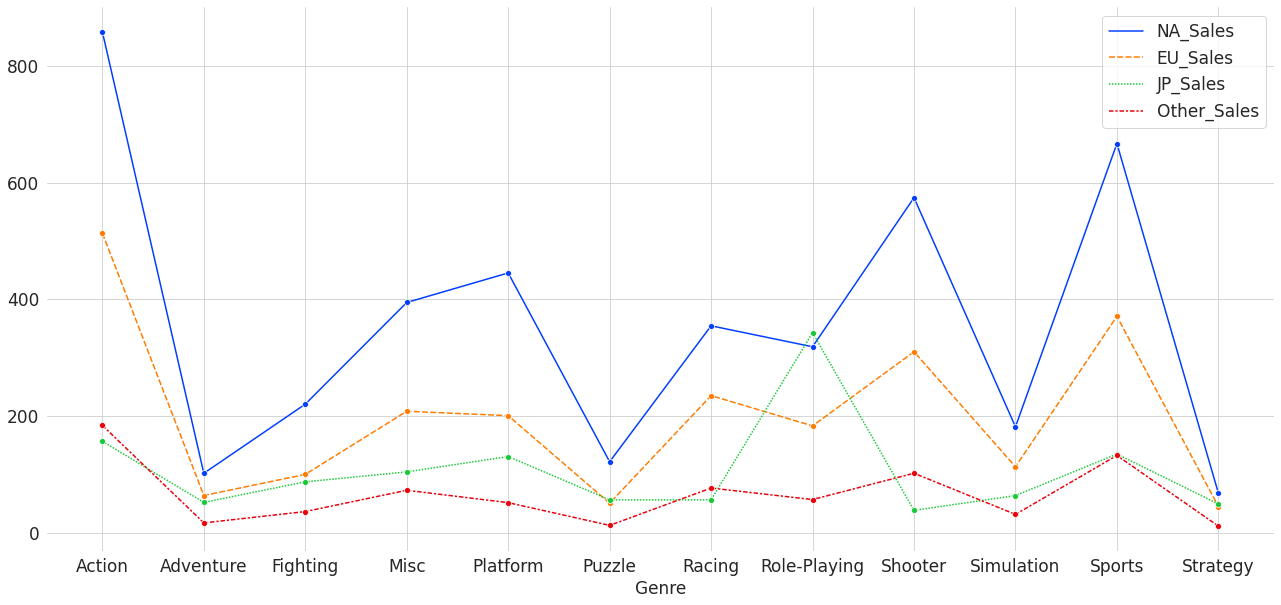

In [24]:
sns.set_palette('bright') 
sns.set_style("whitegrid")
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] =17
plt.figure(figsize=(22,10))
plt.box(False)
Z= sns.lineplot(data=df_c ,marker = 'o')
plt.savefig('지역별 선호장르last.png')#다운로드 코드

In [25]:
#2.연도별 게임의 트렌드가 있을까?

In [26]:
io=df.loc[:,['Year','Total_Sales','Genre']]
ioo=io.groupby(['Year','Genre']).sum()
ioo=ioo.reset_index() #groupby로 묶어준다음 인덱스 재정렬해줘야 가공 가능

In [27]:
ioo_1=ioo[ioo['Year']<1991]
ioo_1= ioo_1.groupby('Genre').sum()
ioo_1=ioo_1.drop(columns=['Year'])
ioo_1=ioo_1.reset_index() #groupby로 묶어준다음 인덱스 재정렬해줘야 가공 가능
ioo_1=ioo_1.sort_values(by=['Total_Sales'],ascending=[False]).head(5)
ioo_1

,Genre,Total_Sales
4,Platform,145.24
5,Puzzle,68.74
8,Shooter,59.77
0,Action,57.49
10,Sports,33.89


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


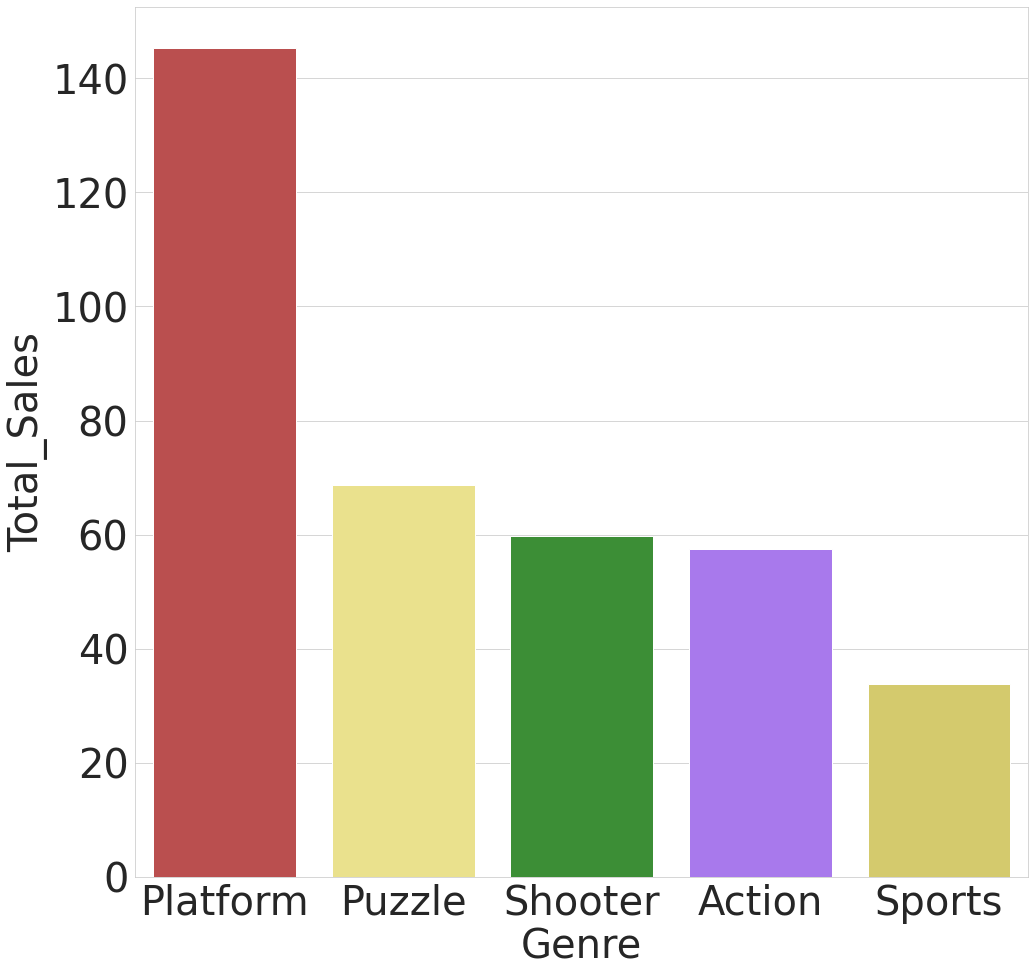

In [28]:
#1980~1990 게임 트렌드
ioo_1=ioo[ioo['Year']<1991]
ioo_1= ioo_1.groupby('Genre').sum()
ioo_1=ioo_1.drop(columns=['Year'])
ioo_1=ioo_1.reset_index() #groupby로 묶어준다음 인덱스 재정렬해줘야 가공 가능
ioo_1=ioo_1.sort_values(by=['Total_Sales'],ascending=[False]).head(5)
plt.rcParams['font.size'] =40
plt.figure(figsize=(16,16))
colors = ['#CC3D3D', '#FAED7D', '#2F9D27', '#A566FF','#E5D85C']
sns.set_palette(sns.color_palette(colors))

sns.barplot(data=ioo_1,x='Genre',y='Total_Sales')
plt.savefig('1980-199000.png',transparent = True)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


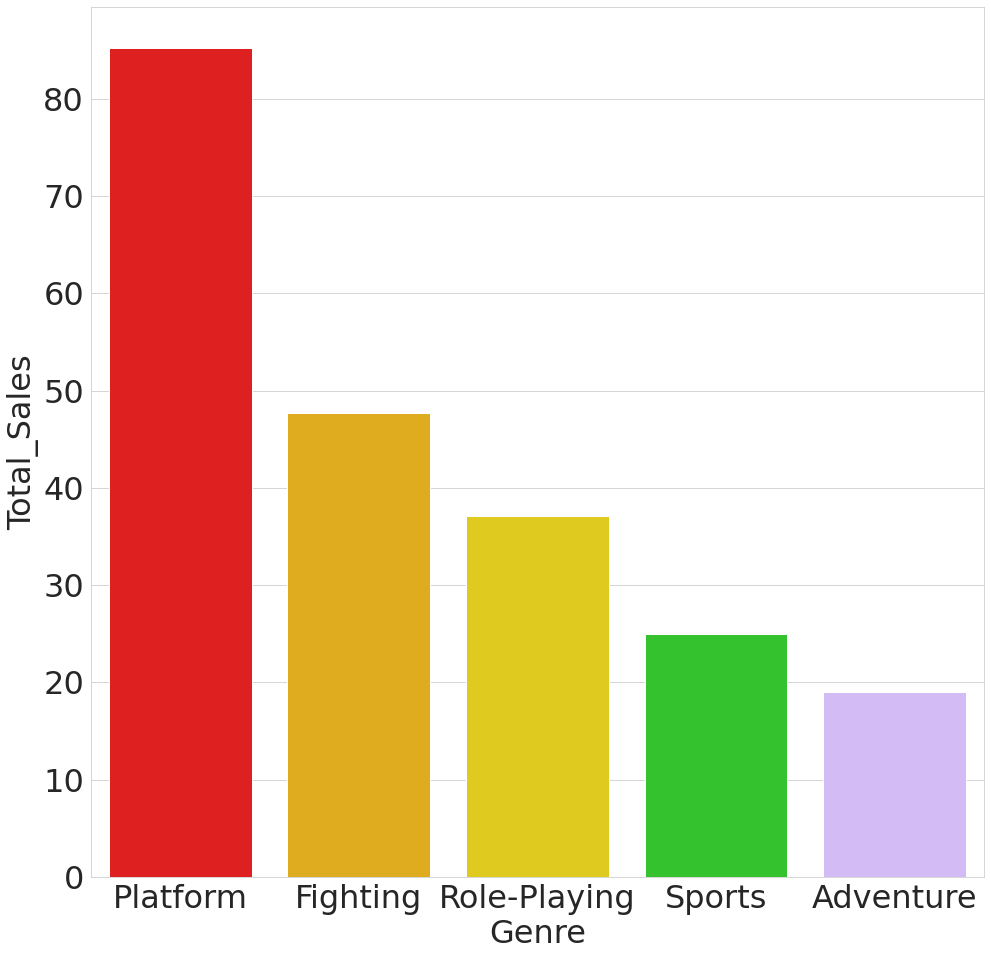

In [29]:
#1991~1995 게임 트렌드
ioo_2=ioo[(ioo['Year']>1990) & (ioo['Year']<1996)]
ioo_2= ioo_2.groupby('Genre').sum()
ioo_2=ioo_2.drop(columns=['Year'])
ioo_2=ioo_2.reset_index() #groupby로 묶어준다음 인덱스 재정렬해줘야 가공 가능
ioo_2=ioo_2.sort_values(by=['Total_Sales'],ascending=[False]).head(5)

plt.rcParams['font.size'] = 32
plt.figure(figsize=(16,16))
color = ['#FF0000', '#FFBB00', '#FFE400', '#1DDB16','#D1B2FF']
sns.set_palette(sns.color_palette(color))

sns.barplot(data=ioo_2,x='Genre',y='Total_Sales')
plt.savefig('1991-199500.png',transparent = True)

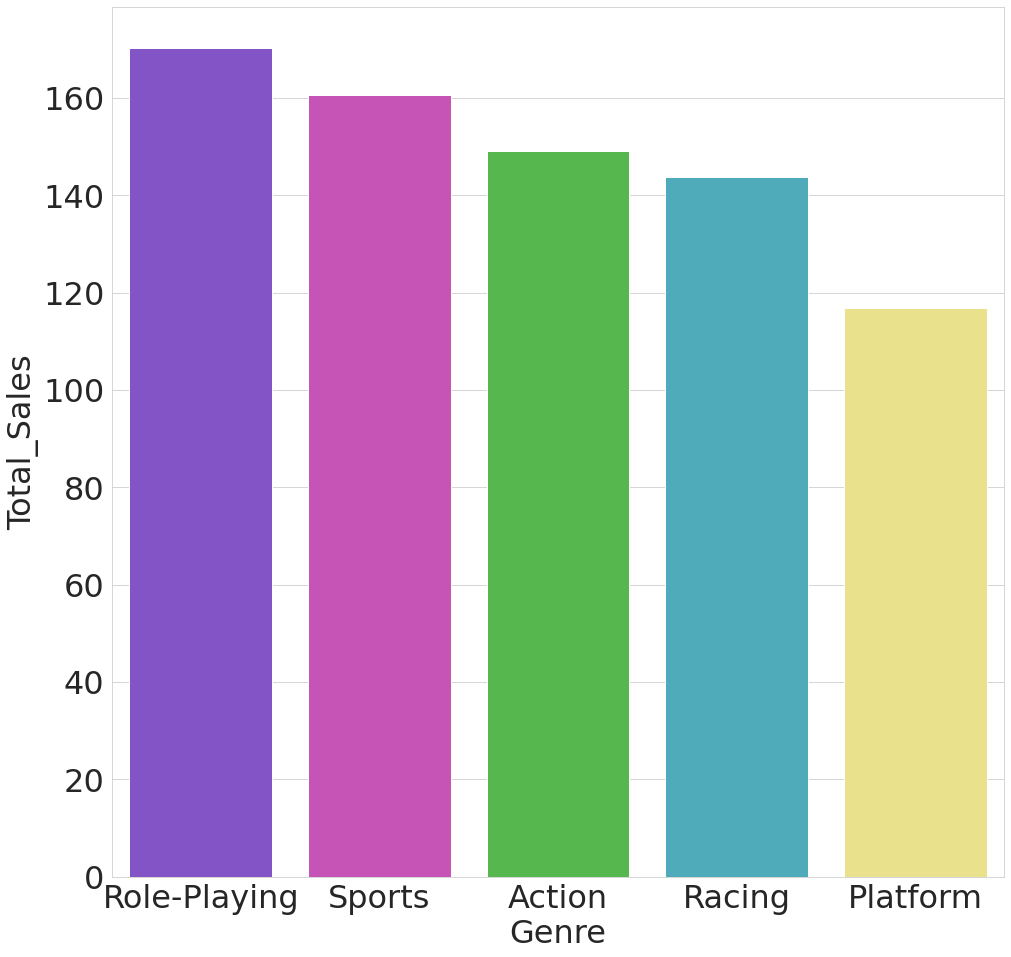

In [30]:
#1996~2000 게임 트렌드
ioo_3=ioo[(ioo['Year']>1995) & (ioo['Year']<2001)]
ioo_3= ioo_3.groupby('Genre').sum()
ioo_3=ioo_3.drop(columns=['Year'])
ioo_3=ioo_3.reset_index() #groupby로 묶어준다음 인덱스 재정렬해줘야 가공 가능
ioo_3=ioo_3.sort_values(by=['Total_Sales'],ascending=[False]).head(5)

plt.rcParams['font.size'] = 32
plt.figure(figsize=(16,16))
color1 = ['#8041D9', '#D941C5', '#47C83E', '#3DB7CC','#FAED7D']
sns.set_palette(sns.color_palette(color1))
sns.barplot(data=ioo_3,x='Genre',y='Total_Sales')
plt.savefig('1996-200.png',transparent = True)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


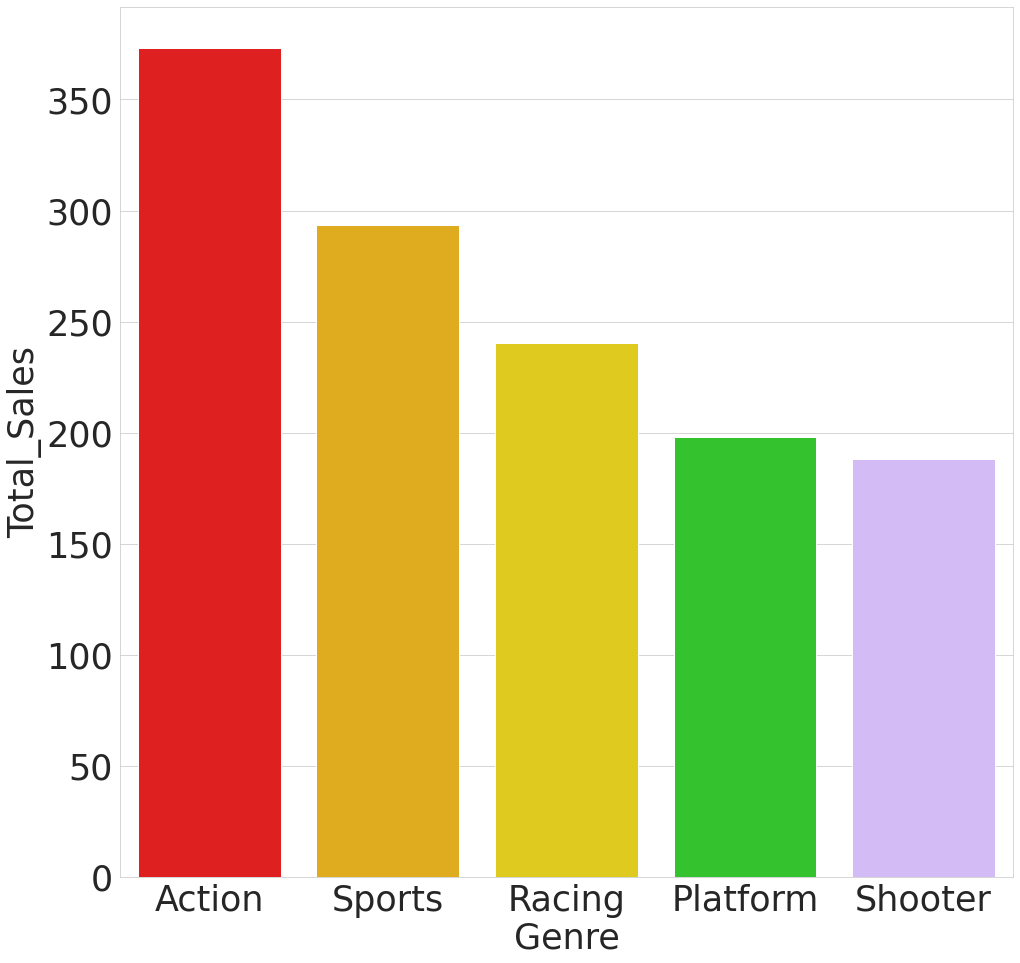

In [31]:
#2001~2005 게임 트렌드
ioo_=ioo[(ioo['Year']>2000) & (ioo['Year']<2006)]
ioo_= ioo_.groupby('Genre').sum()
ioo_=ioo_.drop(columns=['Year'])
ioo_=ioo_.reset_index() #groupby로 묶어준다음 인덱스 재정렬해줘야 가공 가능
ioo_=ioo_.sort_values(by=['Total_Sales'],ascending=[False]).head(5)

plt.rcParams['font.size'] = 35
plt.figure(figsize=(16,16))
color2 = ['#FF0000', '#FFBB00', '#FFE400', '#1DDB16','#D1B2FF']
sns.set_palette(sns.color_palette(color2))

sns.barplot(data=ioo_,x='Genre',y='Total_Sales')
plt.savefig('2001-2005.png',transparent = True)

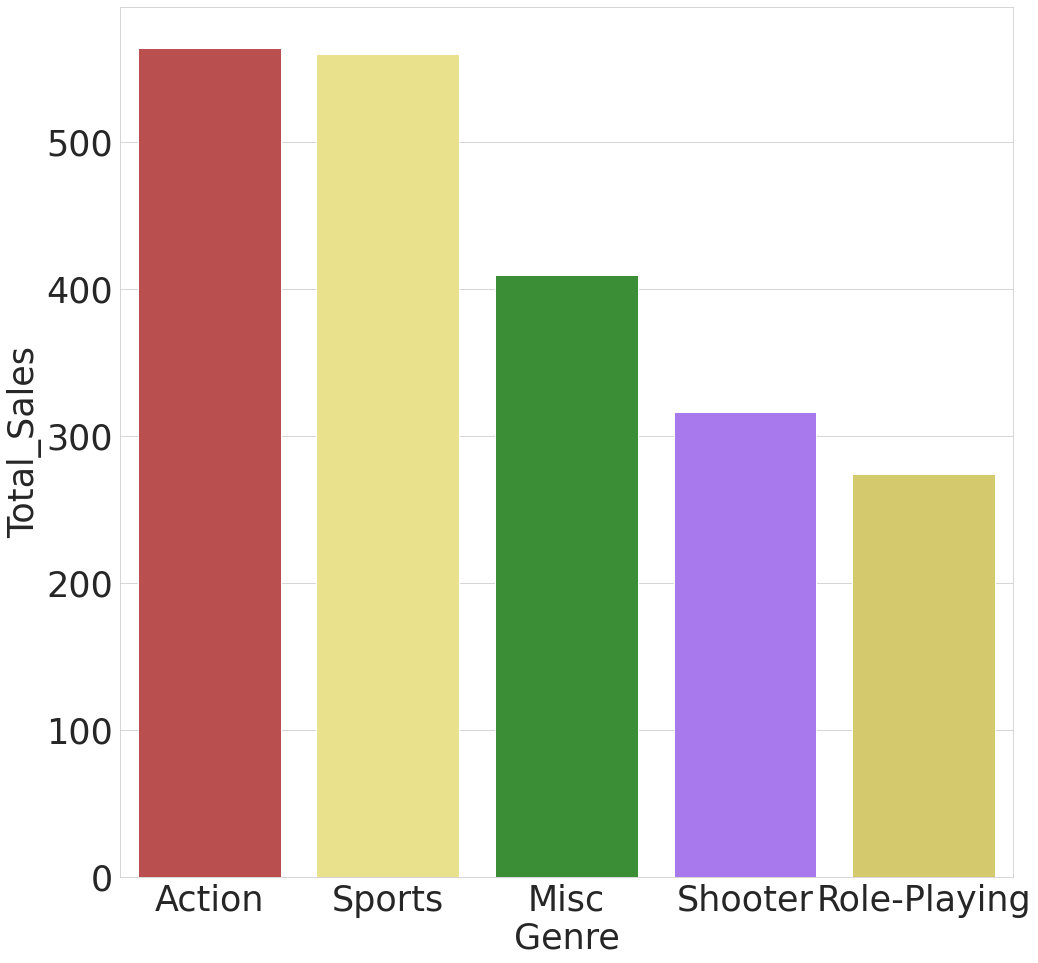

In [32]:
#2006~2010 게임 트렌드
ioo_4=ioo[(ioo['Year']>2005) & (ioo['Year']<2011)]
ioo_4= ioo_4.groupby('Genre').sum()
ioo_4=ioo_4.drop(columns=['Year'])
ioo_4=ioo_4.reset_index() #groupby로 묶어준다음 인덱스 재정렬해줘야 가공 가능
ioo_4=ioo_4.sort_values(by=['Total_Sales'],ascending=[False]).head(5)

plt.rcParams['font.size'] = 35
plt.figure(figsize=(16,16))
color3 = ['#CC3D3D', '#FAED7D', '#2F9D27', '#A566FF','#E5D85C']
sns.set_palette(sns.color_palette(color3))
sns.barplot(data=ioo_4,x='Genre',y='Total_Sales')
plt.savefig('2006-2010.png',transparent = True)

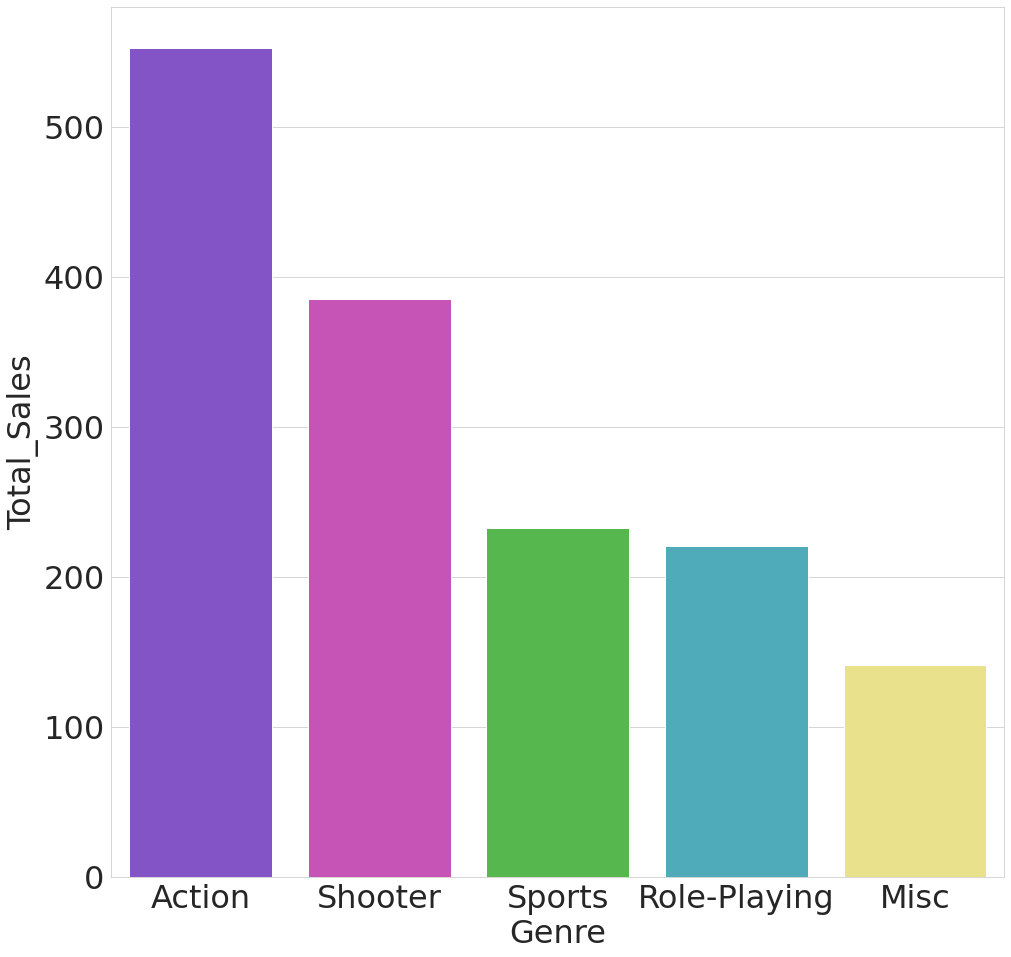

In [33]:
#2011~2020 게임 트렌드
ioo_7=ioo[(ioo['Year']>2010) & (ioo['Year']<2021)]
ioo_7= ioo_7.groupby('Genre').sum()
ioo_7=ioo_7.drop(columns=['Year'])
ioo_7=ioo_7.reset_index() #groupby로 묶어준다음 인덱스 재정렬해줘야 가공 가능
ioo_7=ioo_7.sort_values(by=['Total_Sales'],ascending=[False]).head(5)

plt.rcParams['font.size'] = 32
plt.figure(figsize=(16,16))
color4 = ['#8041D9', '#D941C5', '#47C83E', '#3DB7CC','#FAED7D']
sns.set_palette(sns.color_palette(color4))
sns.barplot(data=ioo_7,x='Genre',y='Total_Sales')
plt.savefig('2011-2020.png',transparent = True)

In [34]:
#3.출고량이 높은 게임에 대한 분석 및 시각화 프로세스

In [35]:
# 3.1전체게임 분석 및 시각화

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


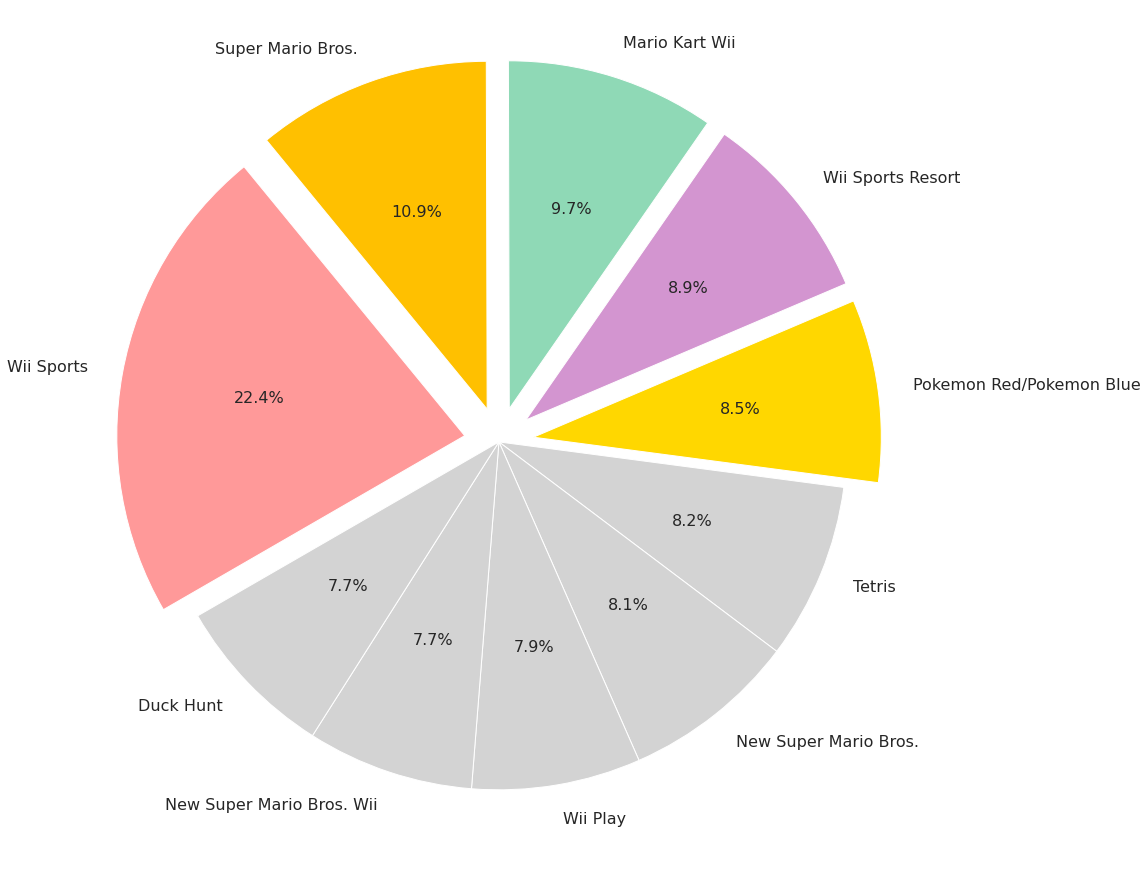

In [36]:
#전체 게임 출고량 순위 top 10
df_b=df.sort_values(by=['Total_Sales'],ascending=[False]).head(10)

plt.rcParams['font.size'] = 16
plt.figure(figsize=(16,16))
explode = [0.10,0.10,0.10,0.10,0.10, 0,0,0,0,0]
color5 = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gold', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray']
plt.pie(df_b['Total_Sales'], labels=df_b['Name'], autopct='%.1f%%',startangle=210, counterclock=False,explode=explode, colors=color5)
plt.savefig('f10.png',transparent = True)
plt.show()

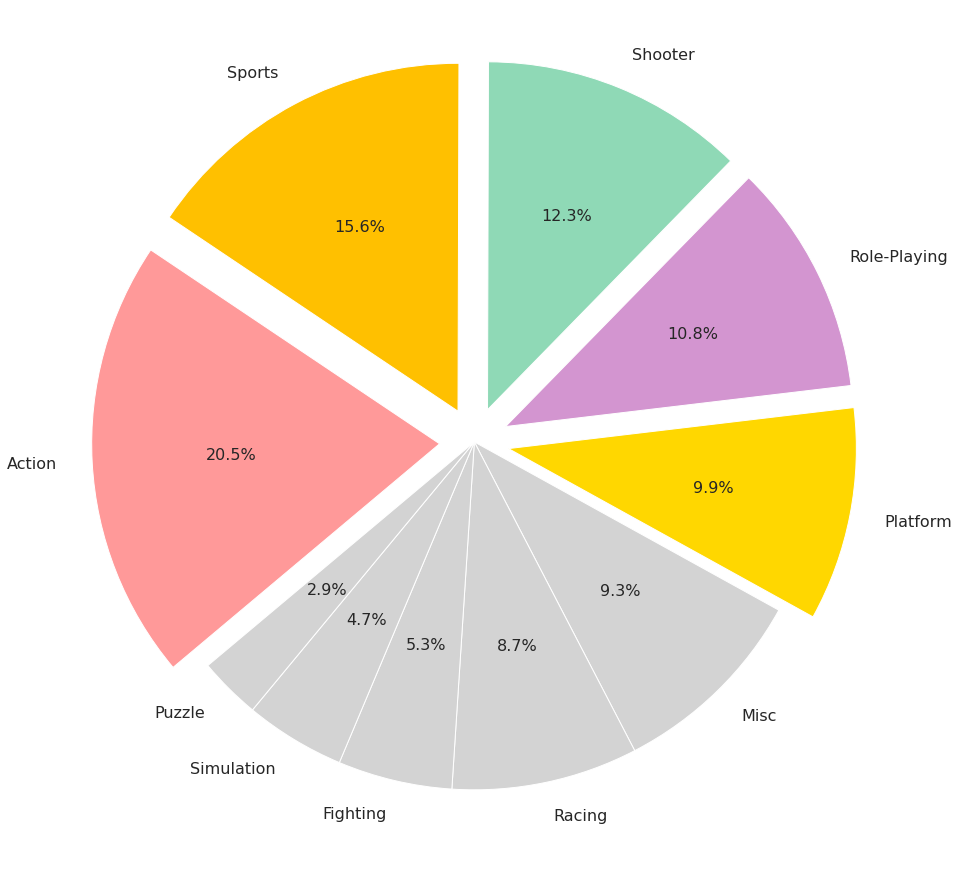

In [37]:
#전체 장르 top 10
df_G = df.groupby('Genre').sum()
df_G = df_G.reset_index() #groupby로 묶어준다음 인덱스 재정렬해줘야 가공 가능
df_b_g = df_G.sort_values(by=['Total_Sales'],ascending=[False]).head(10)

plt.rcParams['font.size'] = 16
plt.figure(figsize=(16,16))
explode = [0.10,0.10,0.10,0.10,0.10, 0,0,0,0,0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gold', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray']
plt.pie(df_b_g['Total_Sales'], labels=df_b_g['Genre'], autopct='%.1f%%',startangle=220, counterclock=False,explode=explode, colors=colors)
plt.show()

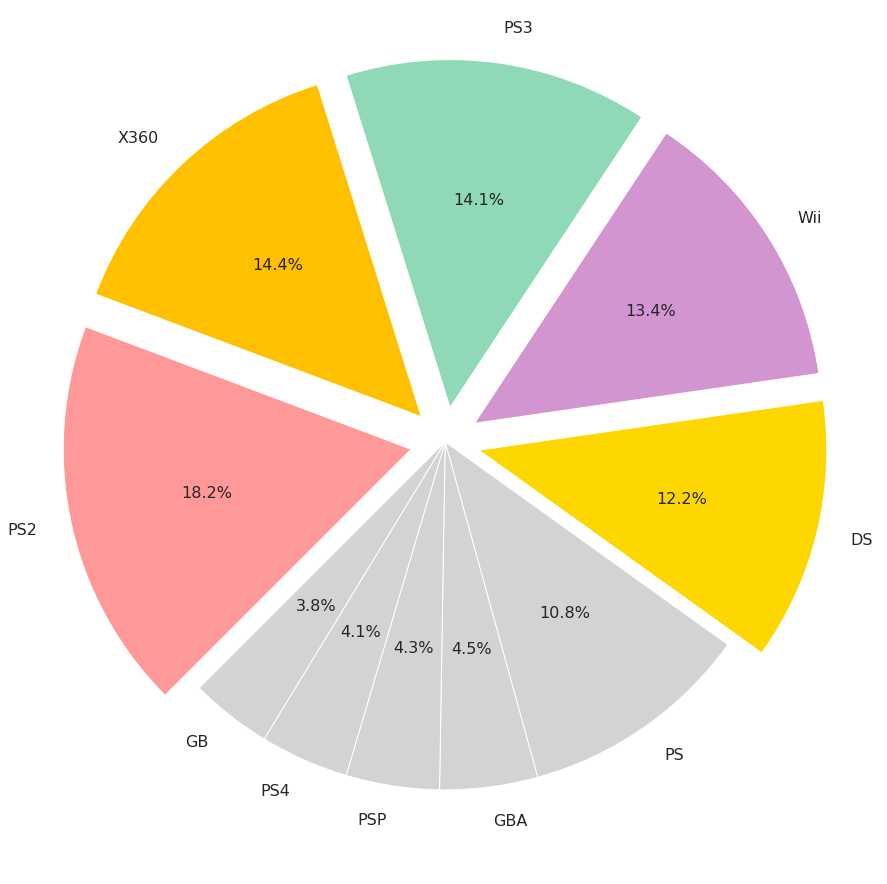

In [38]:
#전체 플랫폼 top 10
df_P =  df.groupby('Platform').sum()
df_P = df_P.reset_index() #groupby로 묶어준다음 인덱스 재정렬해줘야 가공 가능
df_b_p = df_P.sort_values(by=['Total_Sales'],ascending=[False]).head(10)

plt.rcParams['font.size'] = 16
plt.figure(figsize=(16,16))
explode = [0.10,0.10,0.10,0.10,0.10, 0,0,0,0,0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gold', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray']
plt.pie(df_b_p['Total_Sales'], labels=df_b_p['Platform'], autopct='%.1f%%',startangle=225, counterclock=False,explode=explode, colors=colors)
plt.savefig('ff10.png',transparent = True)
plt.show()

In [39]:
# 3.2 지역별게임 분석 및 시각화

In [40]:
# 3.2.1 각 지역별 게임 출고량 순위 top 10
df_b_1=df.sort_values(by=['NA_Sales'],ascending=[False]).head(10)
df_b_2=df.sort_values(by=['EU_Sales'],ascending=[False]).head(10)
df_b_3=df.sort_values(by=['JP_Sales'],ascending=[False]).head(10)
df_b_4=df.sort_values(by=['Other_Sales'],ascending=[False]).head(10)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


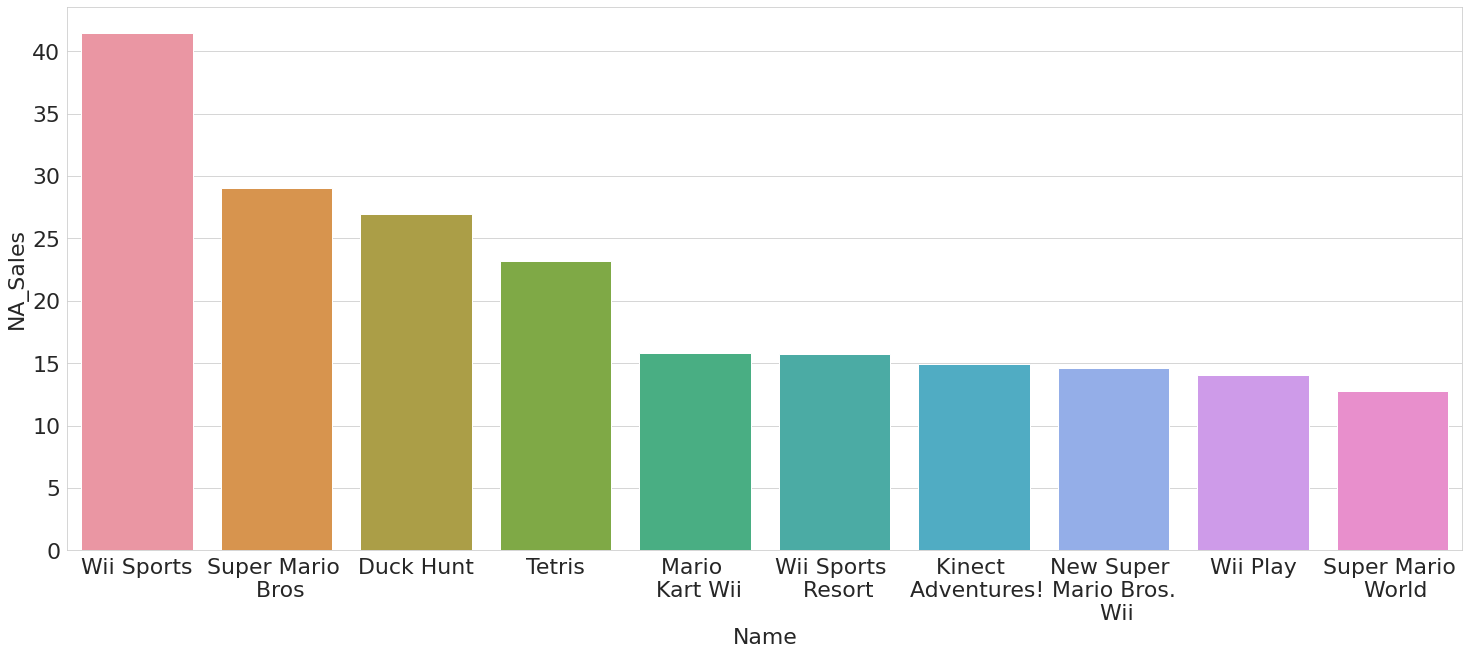

In [41]:
#북미지역 게임 출고량 top 10
plt.rcParams['font.size'] = 22
plt.figure(figsize=(25,10))
colors = ['#8041D9', '#D941C5', '#47C83E', '#3DB7CC','#FAED7D']
sns.set_palette(sns.color_palette(colors))
z = sns.barplot(data=df_b_1,x='Name',y='NA_Sales')
z.set_xticklabels(["Wii Sports",'Super Mario \n Bros','Duck Hunt','Tetris','Mario \n Kart Wii','Wii Sports \n Resort','Kinect \n Adventures!','New Super \n Mario Bros. \n Wii','Wii Play','Super Mario \n World'])
plt.savefig('nt10.png',transparent = True)
plt.show()

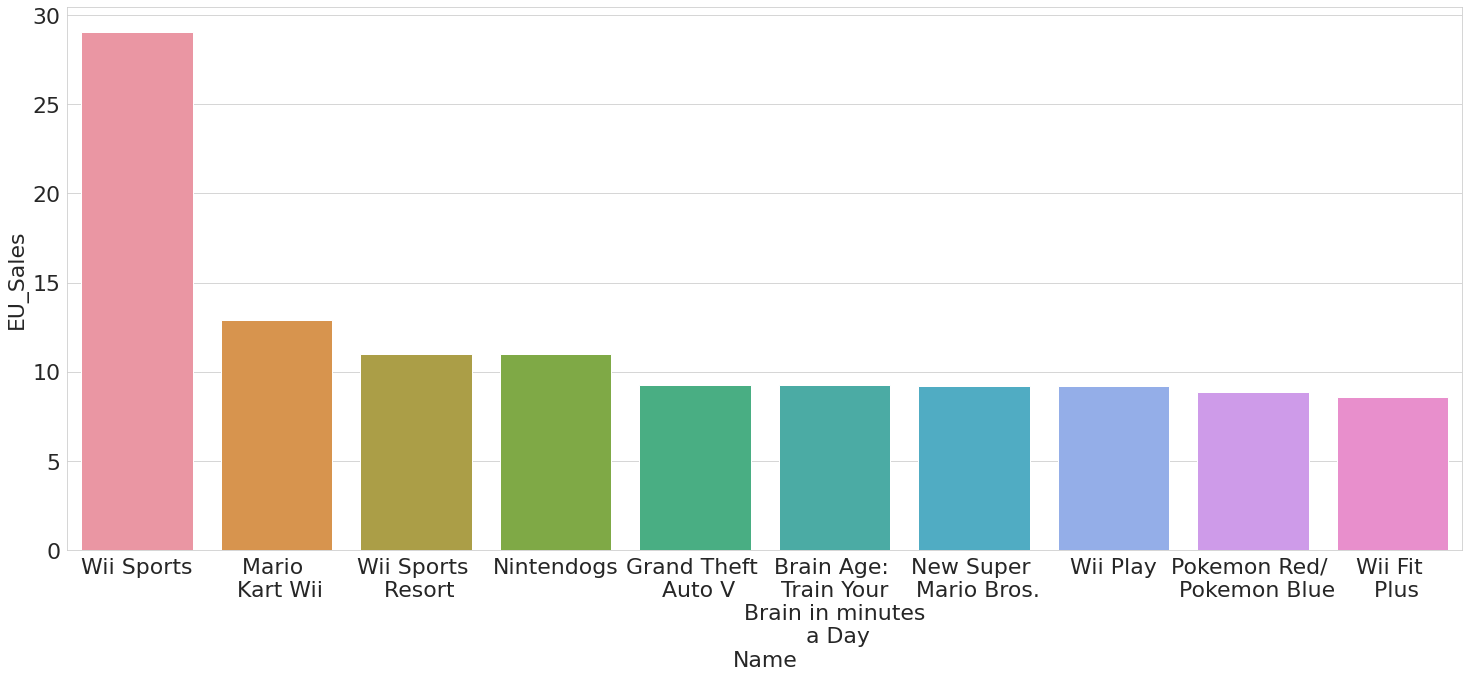

In [42]:
#유럽지역 게임 출고량 top 10
plt.rcParams['font.size'] = 22
plt.figure(figsize=(25,10))
colors = ['#8041D9', '#D941C5', '#47C83E', '#3DB7CC','#FAED7D']
sns.set_palette(sns.color_palette(colors))
z1 = sns.barplot(data=df_b_2,x='Name',y='EU_Sales')

z1.set_xticklabels(["Wii Sports",'Mario \n Kart Wii','Wii Sports \n Resort','Nintendogs','Grand Theft \n Auto V','Brain Age: \n Train Your \n Brain in minutes \n a Day',
                   'New Super \n Mario Bros.','Wii Play','Pokemon Red/ \n Pokemon Blue','Wii Fit \n Plus'])
plt.savefig('Et10.png',transparent = True)

plt.show()

In [43]:
df_b_3

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
7829,7830.0,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.38
9416,9417.0,Pokemon Gold/Pokemon Silver,GB,1999.0,Role-Playing,Nintendo,9.00,6.18,7.20,0.71,23.09
4199,4200.0,Super Mario Bros.,NES,1985.0,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
6937,6938.0,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
10555,10556.0,Pokemon Diamond/Pokemon Pearl,DS,2006.0,Role-Playing,Nintendo,6.42,4.52,6.04,1.37,18.35
10621,10622.0,Pokemon Black/Pokemon White,DS,2010.0,Role-Playing,Nintendo,5.57,3.28,5.65,0.82,15.32
10917,10918.0,Pokemon Ruby/Pokemon Sapphire,GBA,2002.0,Role-Playing,Nintendo,6.06,3.90,5.38,0.50,15.84
3273,3274.0,Animal Crossing: Wild World,DS,2005.0,Simulation,Nintendo,2.55,3.52,5.33,0.88,12.28
511,512.0,Brain Age 2: More Training in Minutes a Day,DS,2005.0,Puzzle,Nintendo,3.44,5.36,5.32,1.18,15.30
1847,1848.0,Monster Hunter Freedom 3,PSP,2010.0,Role-Playing,Capcom,0.00,0.00,4.87,0.00,4.87


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


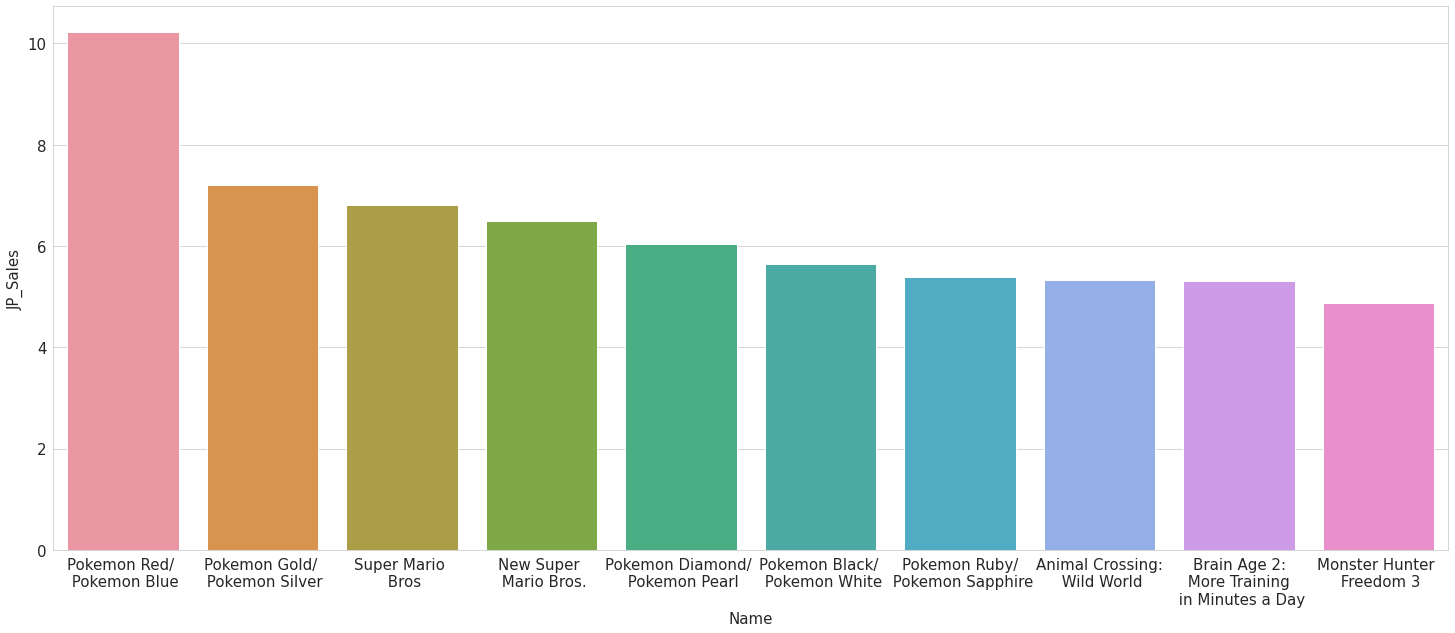

In [44]:
#일본지역 게임 출고량 top 10
plt.rcParams['font.size'] = 15
plt.figure(figsize=(25,10))
colors = ['#8041D9', '#D941C5', '#47C83E', '#3DB7CC','#FAED7D']
sns.set_palette(sns.color_palette(colors))
z2 = sns.barplot(data=df_b_3,x='Name',y='JP_Sales')

z2.set_xticklabels(['Pokemon Red/ \n Pokemon Blue','Pokemon Gold/ \n Pokemon Silver','Super Mario \n Bros','New Super \n Mario Bros.','Pokemon Diamond/ \n Pokemon Pearl','Pokemon Black/ \n Pokemon White',
                    "Pokemon Ruby/\n Pokemon Sapphire",'Animal Crossing:\n Wild World','Brain Age 2:\n More Training \n in Minutes a Day','Monster Hunter \n Freedom 3'])
plt.savefig('jt10.png',transparent = True)

plt.show()

In [45]:
df_b_4

,Unnamed: 0,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Total_Sales
14669,14670.0,Grand Theft Auto: San Andreas,PS2,2004.0,Action,Take-Two Interactive,9.43,0.40,0.41,10.57,20.81
2908,2909.0,Wii Sports,Wii,2006.0,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
14665,14666.0,Gran Turismo 4,PS2,2004.0,Racing,Sony Computer Entertainment,3.01,0.01,1.10,7.53,11.65
3483,3484.0,Grand Theft Auto V,PS3,2013.0,Action,Take-Two Interactive,7.01,9.27,0.97,4.14,21.39
12579,12580.0,Mario Kart Wii,Wii,2008.0,Racing,Nintendo,15.85,12.88,3.79,3.31,35.83
3352,3353.0,Wii Sports Resort,Wii,2009.0,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
8213,8214.0,Pro Evolution Soccer 2008,PS2,2007.0,Sports,Konami Digital Entertainment,0.05,0.00,0.64,2.93,3.62
6937,6938.0,New Super Mario Bros.,DS,2006.0,Platform,Nintendo,11.38,9.23,6.50,2.90,30.01
3014,3015.0,Wii Play,Wii,2006.0,Misc,Nintendo,14.03,9.20,2.93,2.85,29.01
11137,11138.0,Nintendogs,DS,2005.0,Simulation,Nintendo,9.07,11.00,1.93,2.75,24.75


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


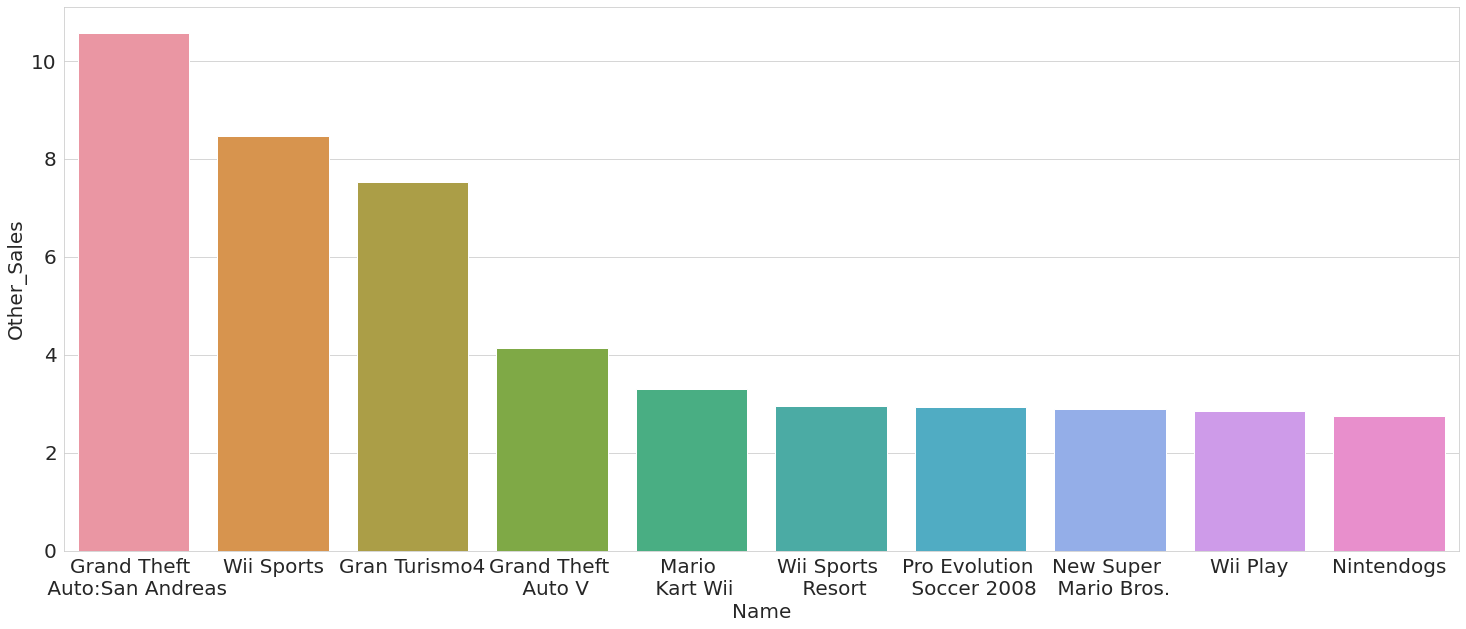

In [46]:
#그 외 국가 게임 출고량 top 10
plt.rcParams['font.size'] = 20
plt.figure(figsize=(25,10))
colors = ['#8041D9', '#D941C5', '#47C83E', '#3DB7CC','#FAED7D']
sns.set_palette(sns.color_palette(colors))
z3 = sns.barplot(data=df_b_4,x='Name',y='Other_Sales')
z3.set_xticklabels(["Grand Theft \n Auto:San Andreas",'Wii Sports','Gran Turismo4','Grand Theft \n Auto V','Mario \n Kart Wii','Wii Sports \n Resort','Pro Evolution \n Soccer 2008',
                    'New Super \n Mario Bros.','Wii Play','Nintendogs'])
plt.savefig('mt10.png',transparent = True)

plt.show()

In [47]:
# 3.2.2 각 지역별 장르 순위 top 10

In [48]:
df_b_g1 = df_G.sort_values(by=['NA_Sales'],ascending=[False]).head(10)
df_b_g2 = df_G.sort_values(by=['EU_Sales'],ascending=[False]).head(10)
df_b_g3 = df_G.sort_values(by=['JP_Sales'],ascending=[False]).head(10)
df_b_g4 = df_G.sort_values(by=['Other_Sales'],ascending=[False]).head(10)

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


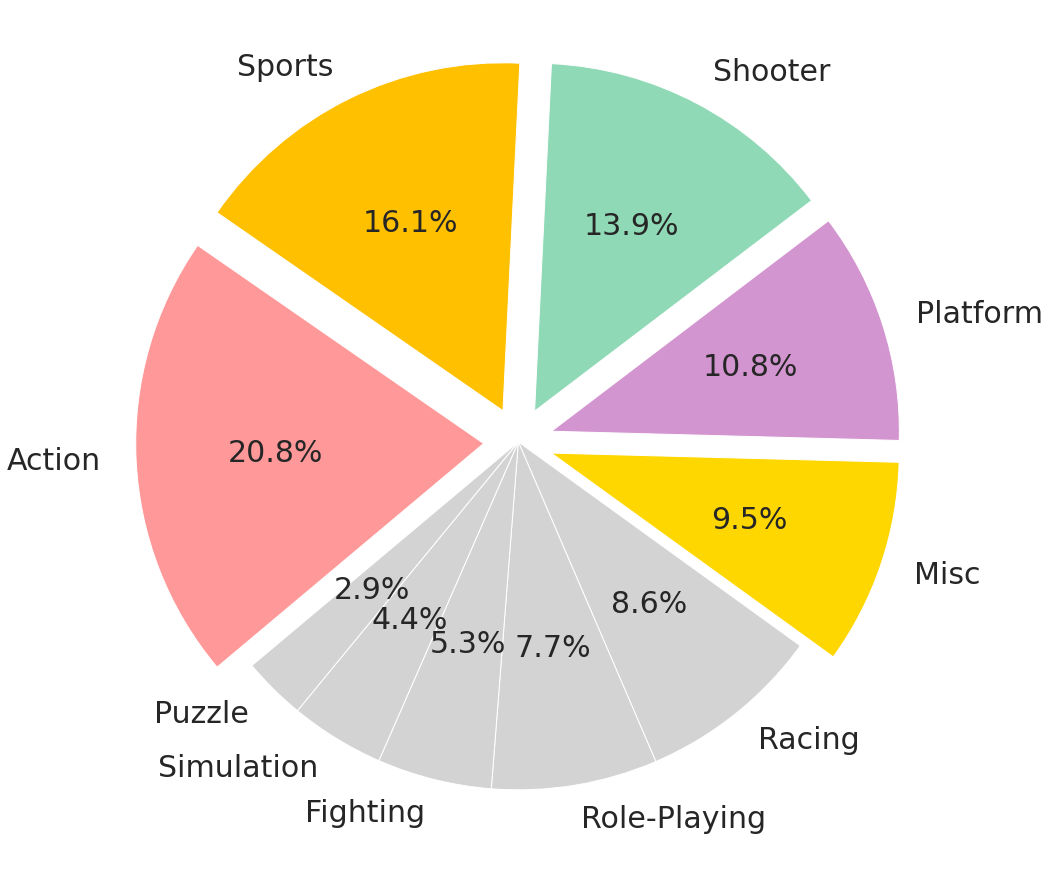

In [49]:
#북미지역 장르 순위 top 10
plt.rcParams['font.size'] = 30
plt.figure(figsize=(16,16))
explode = [0.10,0.10,0.10,0.10,0.10, 0,0,0,0,0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gold', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray']
plt.pie(df_b_g1['NA_Sales'], labels=df_b_g1['Genre'], autopct='%.1f%%',startangle=220, counterclock=False,explode=explode, colors=colors)
plt.savefig('ng10.png',transparent = True)
plt.show()

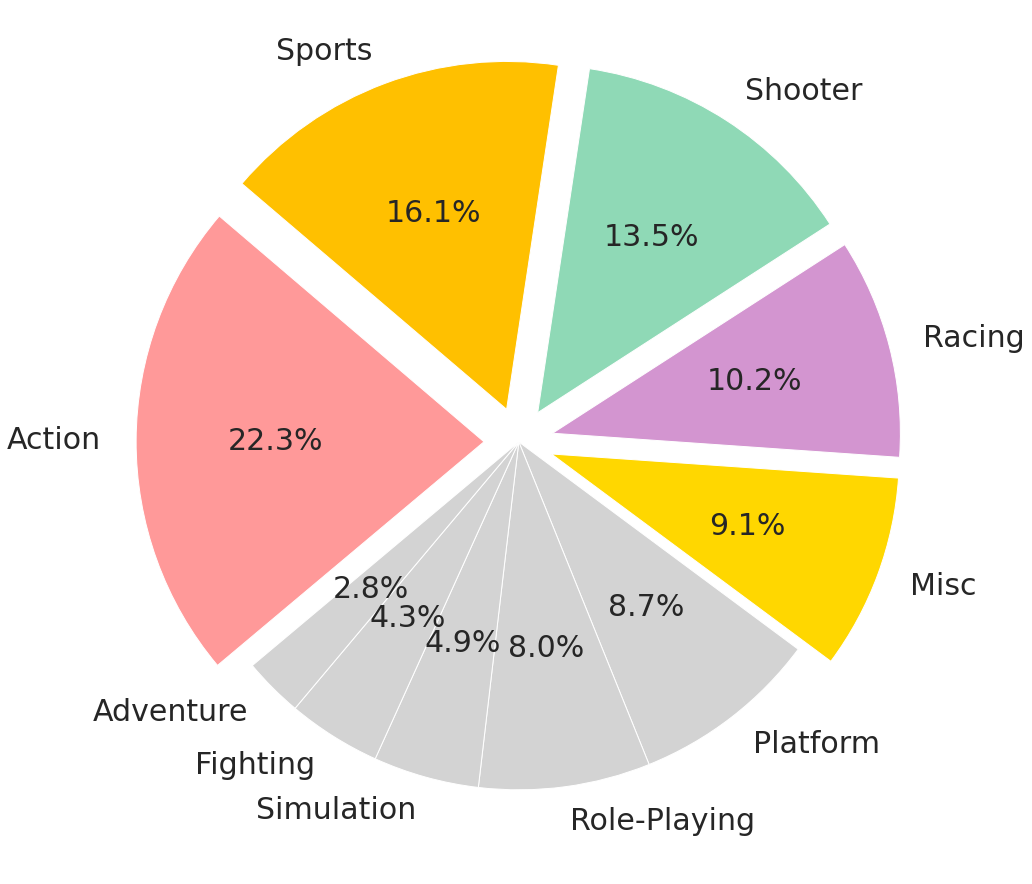

In [50]:
#유럽지역 장르 순위 top 10
plt.rcParams['font.size'] = 30
plt.figure(figsize=(16,16))
explode = [0.10,0.10,0.10,0.10,0.10, 0,0,0,0,0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gold', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray']
plt.pie(df_b_g2['EU_Sales'], labels=df_b_g2['Genre'], autopct='%.1f%%',startangle=220, counterclock=False,explode=explode, colors=colors)
plt.savefig('eg10.png',transparent = True)
plt.show()

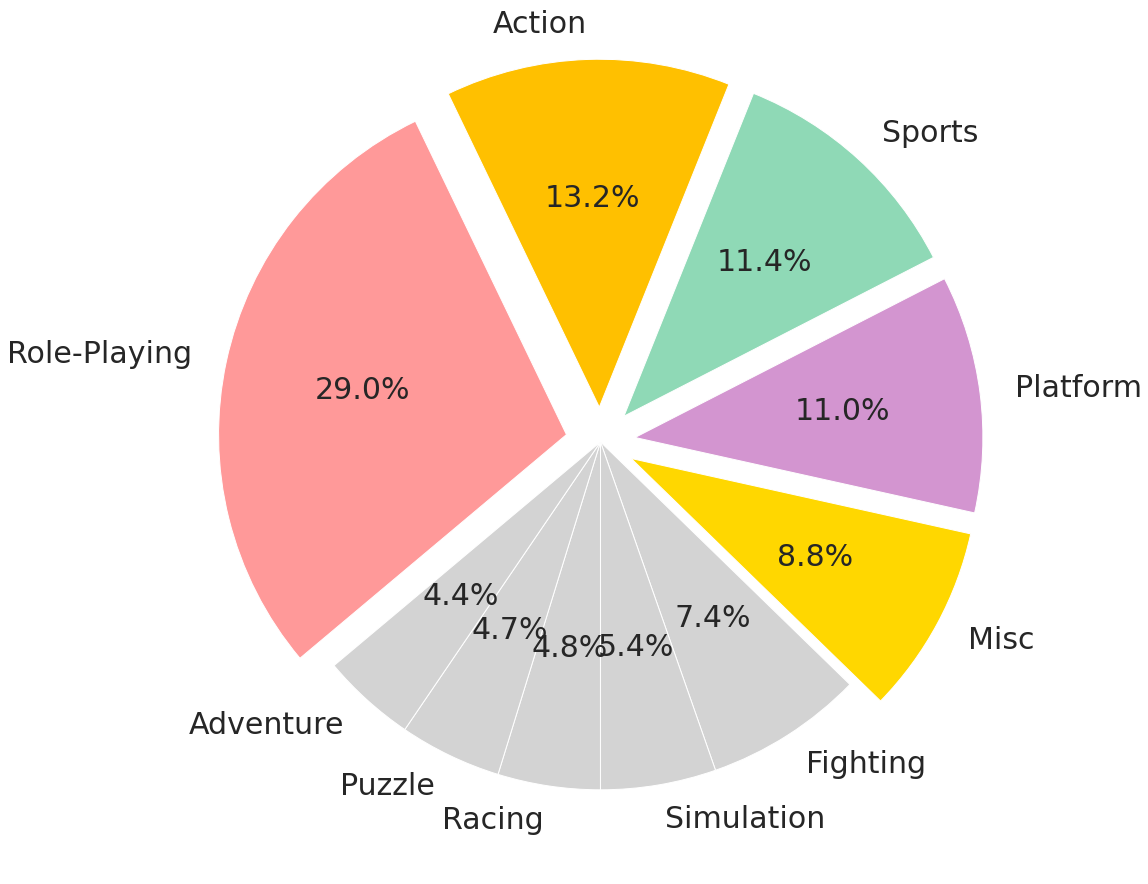

In [51]:
#일본지역 장르 순위 top 10
plt.rcParams['font.size'] = 30
plt.figure(figsize=(16,16))
explode = [0.10,0.10,0.10,0.10,0.10, 0,0,0,0,0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gold', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray']
plt.pie(df_b_g3['JP_Sales'], labels=df_b_g3['Genre'], autopct='%.1f%%',startangle=220, counterclock=False,explode=explode, colors=colors)
plt.savefig('jg10.png',transparent = True)
plt.show()

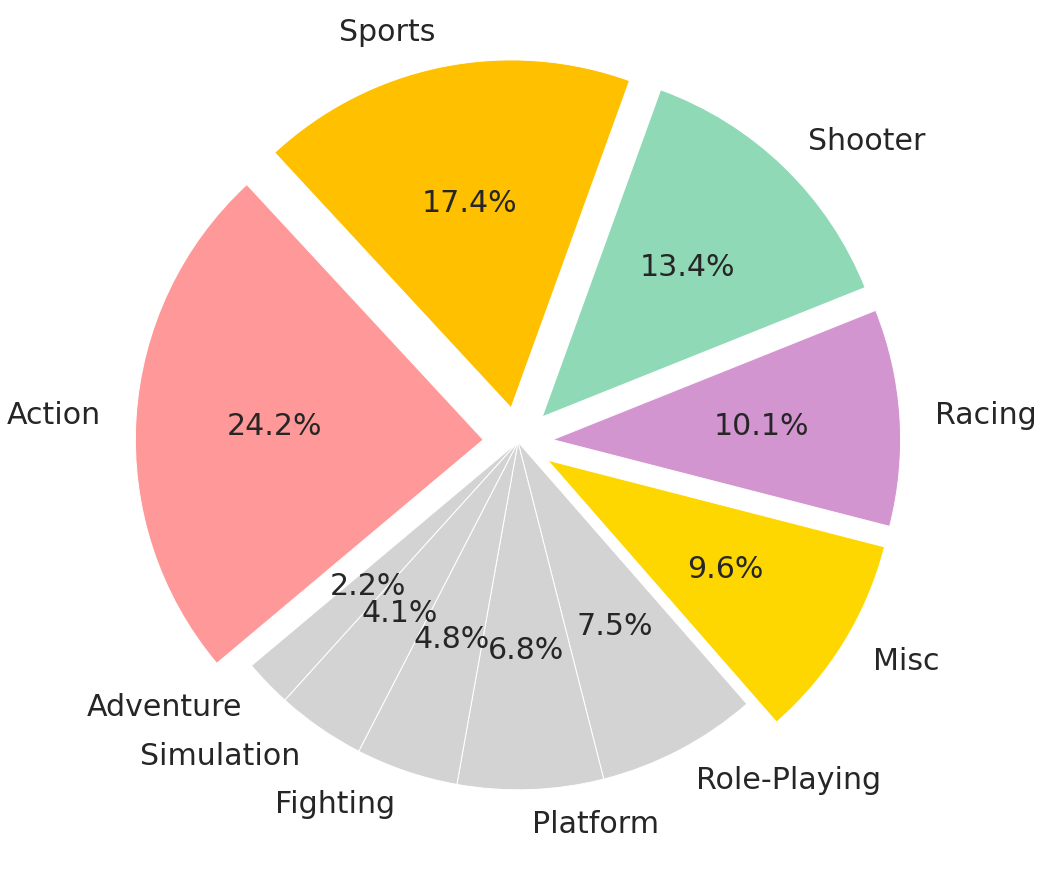

In [52]:
#그 외 국가 장르 순위 top 10
plt.rcParams['font.size'] = 30
plt.figure(figsize=(16,16))
explode = [0.10,0.10,0.10,0.10,0.10, 0,0,0,0,0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gold', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray']
plt.pie(df_b_g4['Other_Sales'], labels=df_b_g4['Genre'], autopct='%.1f%%',startangle=220, counterclock=False,explode=explode, colors=colors)
plt.savefig('mg10.png',transparent = True)
plt.show()

In [53]:
# 3.2.3 각 지역별 플랫폼 순위 top 10

In [54]:
df_b_p1 = df_P.sort_values(by=['NA_Sales'],ascending=[False]).head(10)
df_b_p2 = df_P.sort_values(by=['EU_Sales'],ascending=[False]).head(10)
df_b_p3 = df_P.sort_values(by=['JP_Sales'],ascending=[False]).head(10)
df_b_p4 = df_P.sort_values(by=['Other_Sales'],ascending=[False]).head(10)

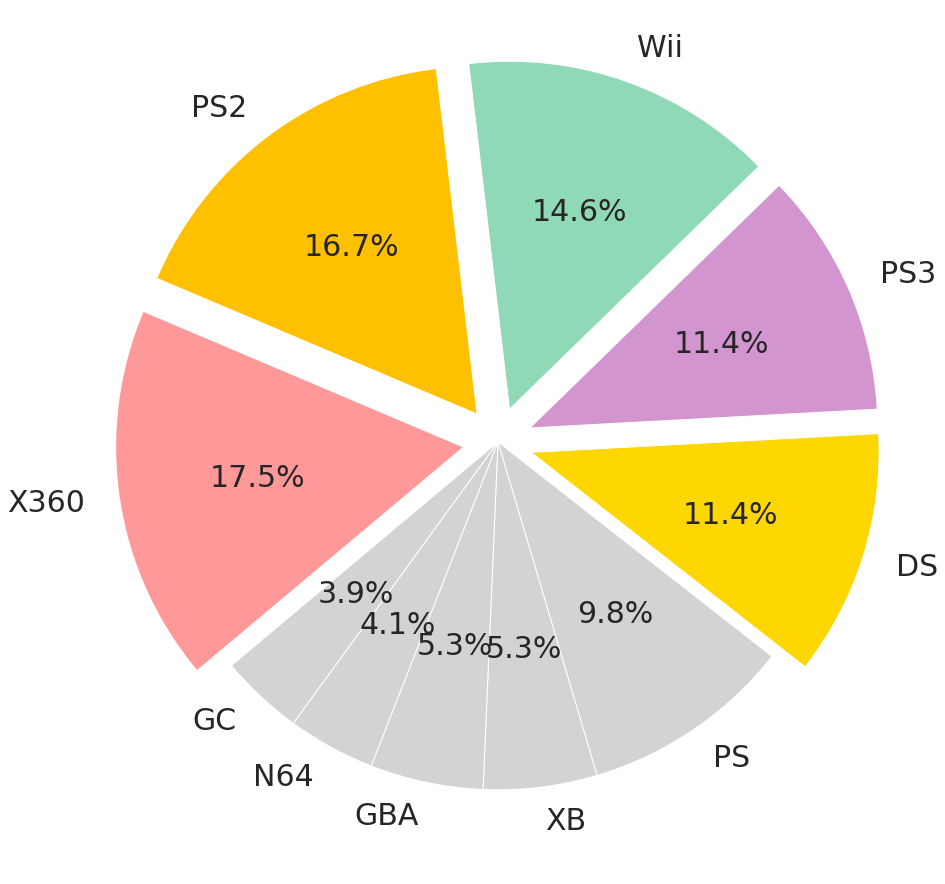

In [55]:
#북미지역 플랫폼 순위 top 10
plt.rcParams['font.size'] = 30
plt.figure(figsize=(16,16))
explode = [0.10,0.10,0.10,0.10,0.10, 0,0,0,0,0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gold', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray']
plt.pie(df_b_p1['NA_Sales'], labels=df_b_p1['Platform'], autopct='%.1f%%',startangle=220, counterclock=False,explode=explode, colors=colors)
plt.savefig('nF10.png',transparent = True)
plt.show()

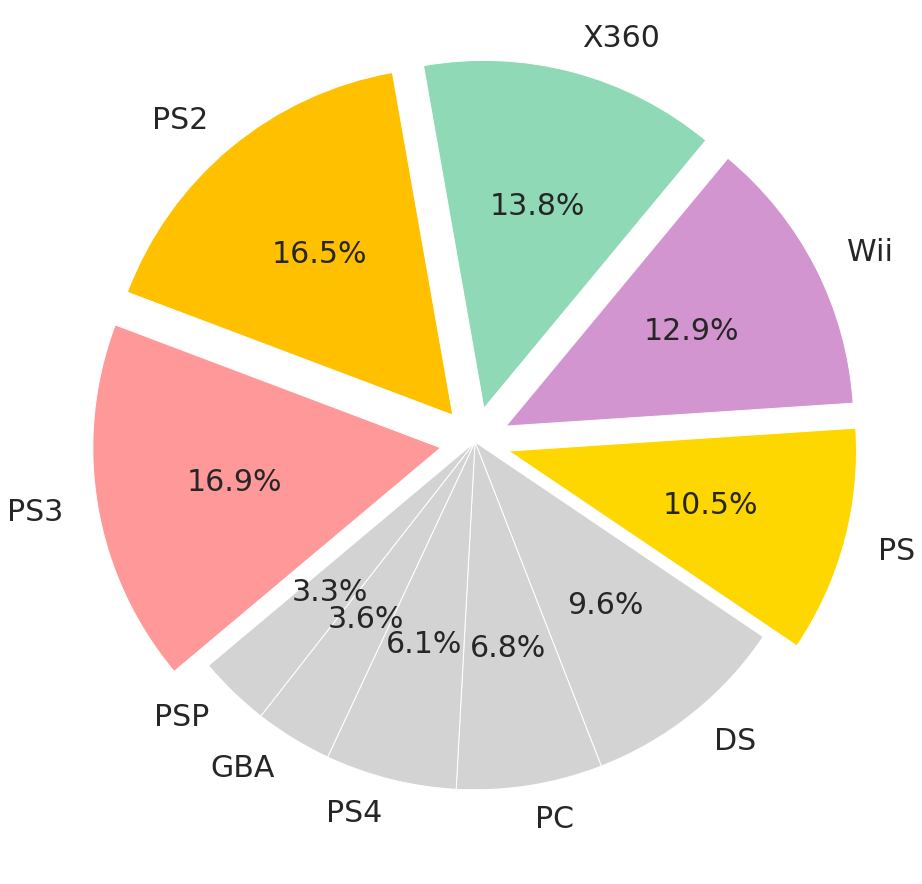

In [56]:
#유럽지역 플랫폼 순위 top 10
plt.rcParams['font.size'] = 30
plt.figure(figsize=(16,16))
explode = [0.10,0.10,0.10,0.10,0.10, 0,0,0,0,0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gold', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray']
plt.pie(df_b_p2['EU_Sales'], labels=df_b_p2['Platform'], autopct='%.1f%%',startangle=220, counterclock=False,explode=explode, colors=colors)
plt.savefig('eF10.png',transparent = True)
plt.show()

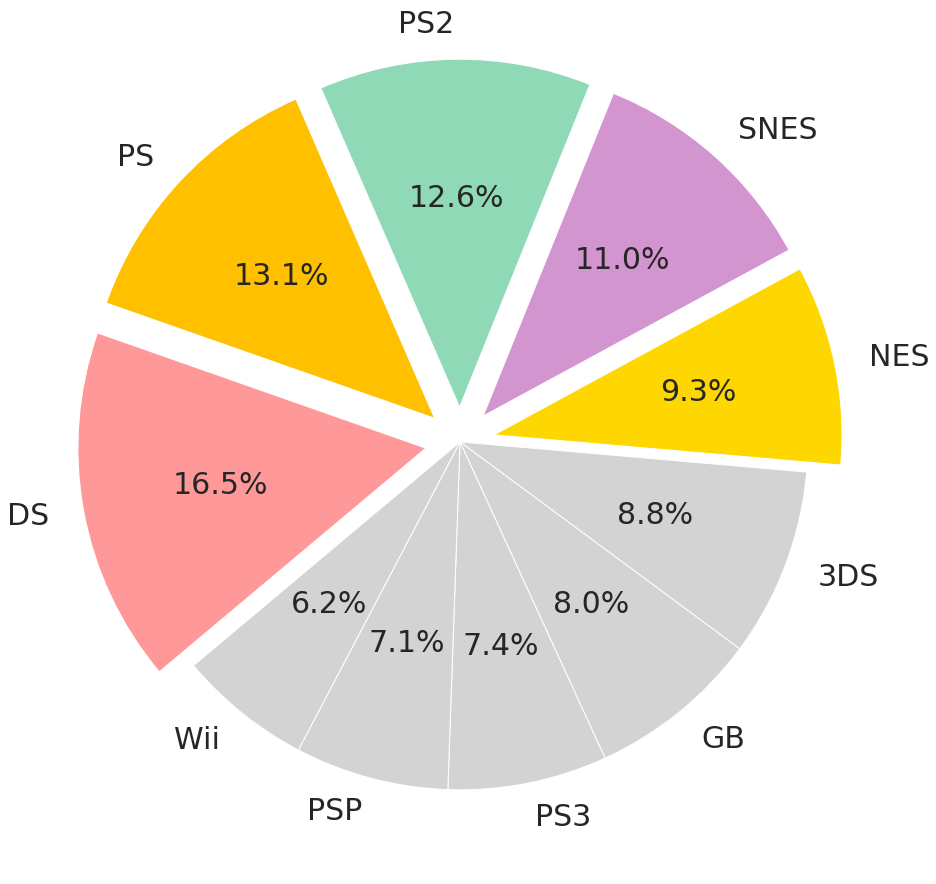

In [57]:
#일본지역 플랫폼 순위 top 10
plt.rcParams['font.size'] = 30
plt.figure(figsize=(16,16))
explode = [0.10,0.10,0.10,0.10,0.10, 0,0,0,0,0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gold', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray']
plt.pie(df_b_p3['JP_Sales'], labels=df_b_p3['Platform'], autopct='%.1f%%',startangle=220, counterclock=False,explode=explode, colors=colors)
plt.savefig('jeF10.png',transparent = True)
plt.show()

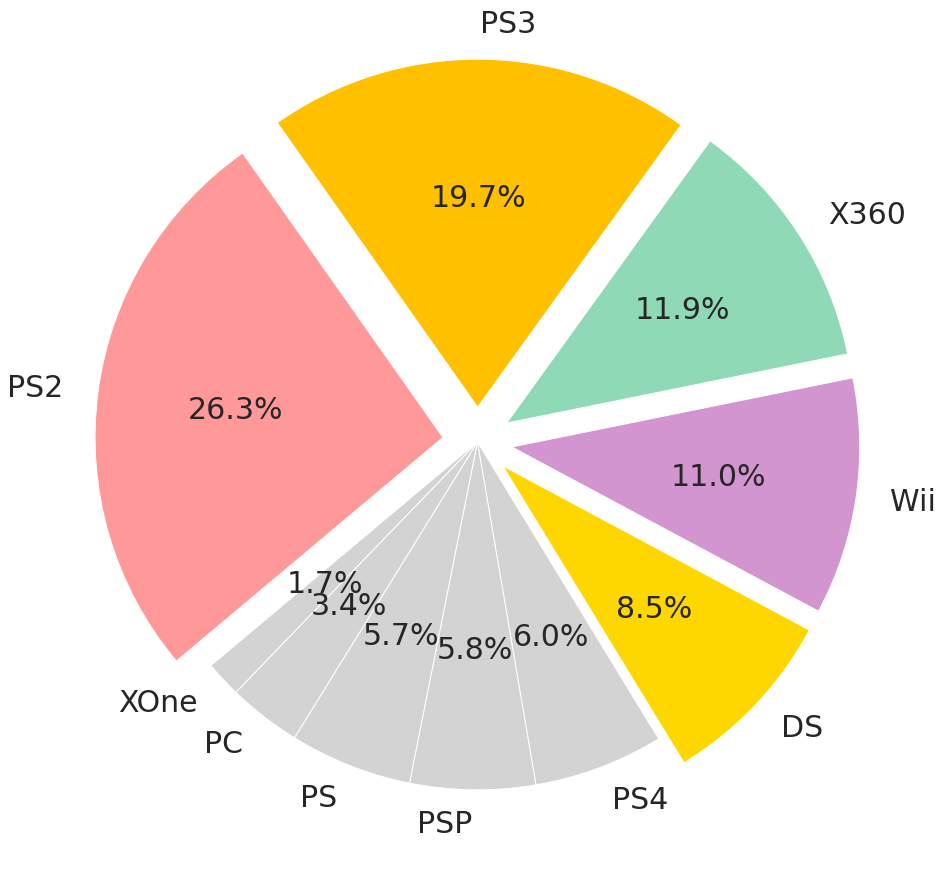

In [58]:
#그 외 국가 플랫폼 순위 top 10
plt.rcParams['font.size'] = 30
plt.figure(figsize=(16,16))
explode = [0.10,0.10,0.10,0.10,0.10, 0,0,0,0,0]
colors = ['#ff9999', '#ffc000', '#8fd9b6', '#d395d0','gold', 'lightgray', 'lightgray', 'lightgray','lightgray','lightgray']
plt.pie(df_b_p4['Other_Sales'], labels=df_b_p4['Platform'], autopct='%.1f%%',startangle=220, counterclock=False,explode=explode, colors=colors)
plt.savefig('meF10.png',transparent = True)
plt.show()

In [59]:
'''
결론: 다음분기에 어떤 게임을 설계해야 할까?

●북미지역 : X360'플랫폼을 활용한 'Action'장르의 게임

●유럽지역 : 'PS3'플랫폼을 활용한 'Action'장르의 게임

●일본지역 : 'DS'플랫폼을 활용한 'Role - Playing'장르의 게임

●기타지역 : 'PS2'플랫폼을 활용한 'Action'장르의 게임
'''


"\n결론: 다음분기에 어떤 게임을 설계해야 할까?\n\n●북미지역 : X360'플랫폼을 활용한 'Action'장르의 게임\n\n●유럽지역 : 'PS3'플랫폼을 활용한 'Action'장르의 게임\n\n●일본지역 : 'DS'플랫폼을 활용한 'Role - Playing'장르의 게임\n\n●기타지역 : 'PS2'플랫폼을 활용한 'Action'장르의 게임\n"